In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from load_data import *

In [33]:
raw_data = get_dataframe("new_data")

date_name = "created_at"
ppm_name = "PM2.5_ATM_ug/m3"

In [34]:
data = pd.DataFrame()
agg_func = {"PM2.5_ATM_ug/m3":"mean", "location":"first", "inside_outside":"first", "lat":"first", "long":"first"}
for location in raw_data["location"].unique():
    location_df = raw_data[raw_data["location"] == location]
    location_df = location_df.groupby(date_name, as_index=False).agg(agg_func)
    data = data.append(location_df)

In [35]:
data = raw_data

In [65]:
arvada_a = data[data["location"] == "Arvada"]
arvada_b = data[data["location"] == "Arvada B"]

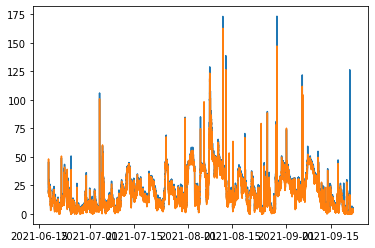

In [56]:
def remove_outliers(df, cutoff=300):
    previous_value = df[ppm_name].iloc[0]
    for i in range(len(df[ppm_name]) - 1):
        current_value = df[ppm_name].iloc[i]
        next_value = df[ppm_name].iloc[i + 1]
        if (current_value - previous_value > cutoff or
            current_value - next_value > cutoff):  # Too big of difference
            df[ppm_name].iloc[i] = previous_value
        else:
            previous_value = (current_value + next_value) / 2
    return df

plt.plot(arvada_a[date_name], arvada_a[ppm_name])

arvada_a = remove_outliers(arvada_a)

plt.plot(arvada_b[date_name], arvada_b[ppm_name])
plt.show()

In [105]:

def merge_a_b(df_a, df_b):
    merged = df_a.merge(df_b, how="outer", on=date_name)
    merged = merged.sort_values(by=date_name)
    # Take first
    col_names = ["location", "inside_outside"]
    for col_name in col_names:
        merged = merged.assign(**{col_name:df_a[col_name].iloc[0]})
        merged = merged.drop([col_name + "_x", col_name + "_y"], axis=1)

    # Take average
    col_names = ["PM2.5_ATM_ug/m3", "lat", "long"]
    for col_name in col_names:
        merged[col_name] = merged[[col_name + "_x", col_name + "_y"]].mean(axis=1)
        merged = merged.drop([col_name + "_x", col_name + "_y"], axis=1)

    return merged

,created_at,location,inside_outside,PM2.5_ATM_ug/m3,lat,long
0,2021-06-18 02:04:00,Arvada,outside,24.595,39.805811,-105.160995
1,2021-06-18 02:06:00,Arvada,outside,46.910,39.805811,-105.160995
2,2021-06-18 02:08:00,Arvada,outside,22.685,39.805811,-105.160995
3,2021-06-18 02:10:00,Arvada,outside,19.230,39.805811,-105.160995
4,2021-06-18 02:12:00,Arvada,outside,18.720,39.805811,-105.160995
...,...,...,...,...,...,...
67575,2021-09-21 23:52:00,Arvada,outside,2.305,39.805811,-105.160995
67576,2021-09-21 23:54:00,Arvada,outside,2.285,39.805811,-105.160995
67577,2021-09-21 23:56:00,Arvada,outside,2.445,39.805811,-105.160995
67578,2021-09-21 23:58:00,Arvada,outside,2.140,39.805811,-105.160995


# Steps for cleaning data:

1. Remove all obvious outliers (Where there is a single spike of 300 or more. Can also compare channels A and B)
2. Round datetime to nearest 10 minutes
3. Average all 10 minute times  
Question: Will this be alright or do we want to create a better method

# Steps for coorelation clustering
There is no python package that does this. Would this work?
1. Clean the data
2. Normalize the data. Make the mean zero and variance one
3. Find the correlation of each of the sensors. O(n^2)
4. Use standard clustering after this. Complete linkage, probably.

Then, display via gps coordinates to visualize correlations.  
Will this work?

TODO:  
Use A-B sensor info for outliers.  
Make 2 minute intervals.  DONE  
Avg left and right DONE

Try standardized and non-standardized clustering data.

Cross-correlation lagged functions.

Use ATM DONE

Air now sensors comparison. EPA Sensors